In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000) 

%matplotlib inline

In [2]:
## loading the dataset. (if the file path is different from the ipynb file, mention the path)
path = ""
car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car_df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
64,65,0,mazda 626,gas,std,four,hatchback,fwd,front,98.8,177.8,66.5,55.5,2425,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,11245.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0
91,92,1,nissan rogue,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649.0
133,134,2,saab 99le,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2695,ohc,four,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2275,ohc,four,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## We dont have any null values in the dataset

In [5]:
# setting the index as car index
car_df.set_index('car_ID',inplace = True)

In [6]:
car_df.describe(include='all')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [7]:
# The first string in the car name column is its manufactures name. parsing the manufacturers name.
car_df['manufactures_name'] = car_df['CarName'].str.split(' ').str[0].str.lower()
car_df['manufactures_name'].value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
vw              2
renault         2
toyouta         1
mercury         1
porcshce        1
vokswagen       1
Name: manufactures_name, dtype: int64

In [8]:
## we can clean the manufactures name as vw - volkswagon and vokswagon - volkswagon etc

car_df['manufactures_name'].replace({'maxda': 'mazda','porcshce':'porsche','toyouta' : 'toyota', 'vokswagen' : 'volkswagon','vw' : 'volkswagon'},regex = True,inplace = True)
car_df['manufactures_name'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
jaguar          3
volkswagon      3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: manufactures_name, dtype: int64

## Analysis

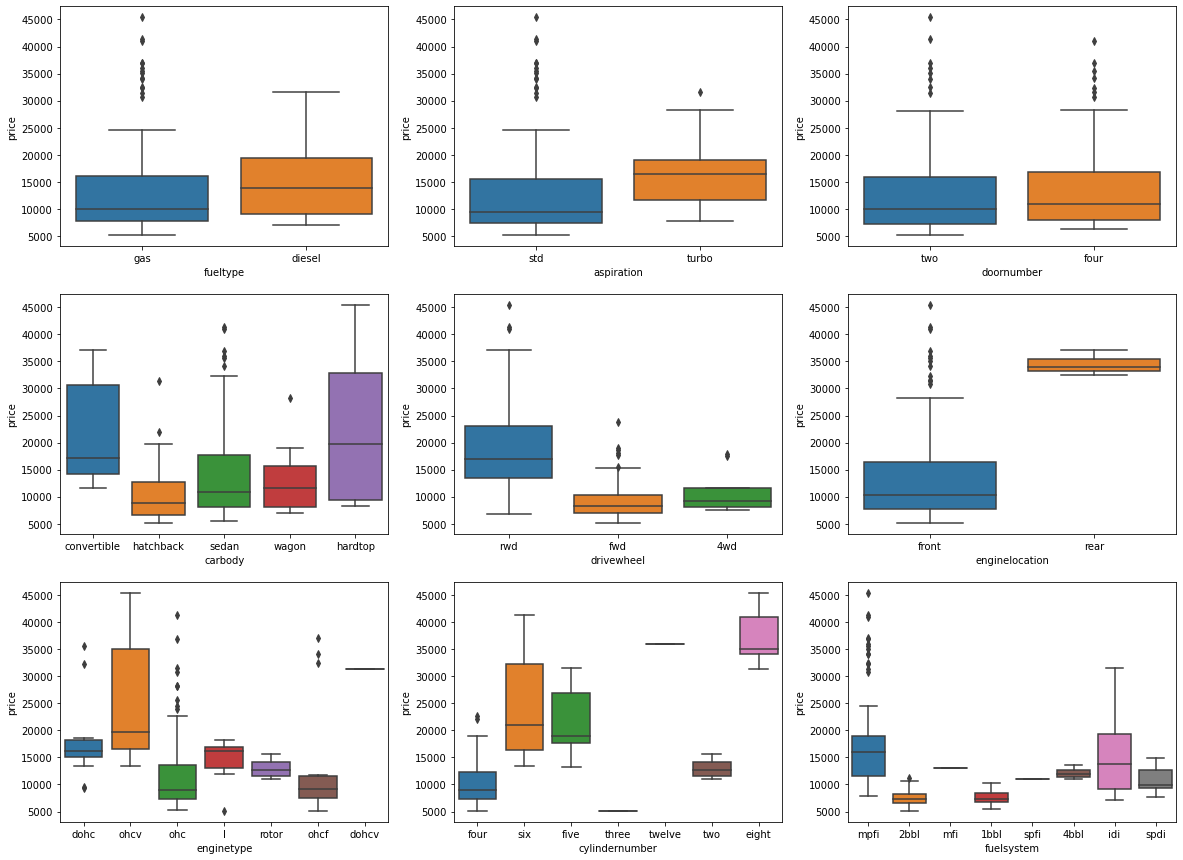

In [9]:
# Creating box plots to know the distribution for price vs categorical data

plt.figure(figsize =(20,15))
plt.subplot(331)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(332)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.subplot(333)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(334)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(335)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)
plt.subplot(336)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(337)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)
plt.subplot(338)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(339)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)

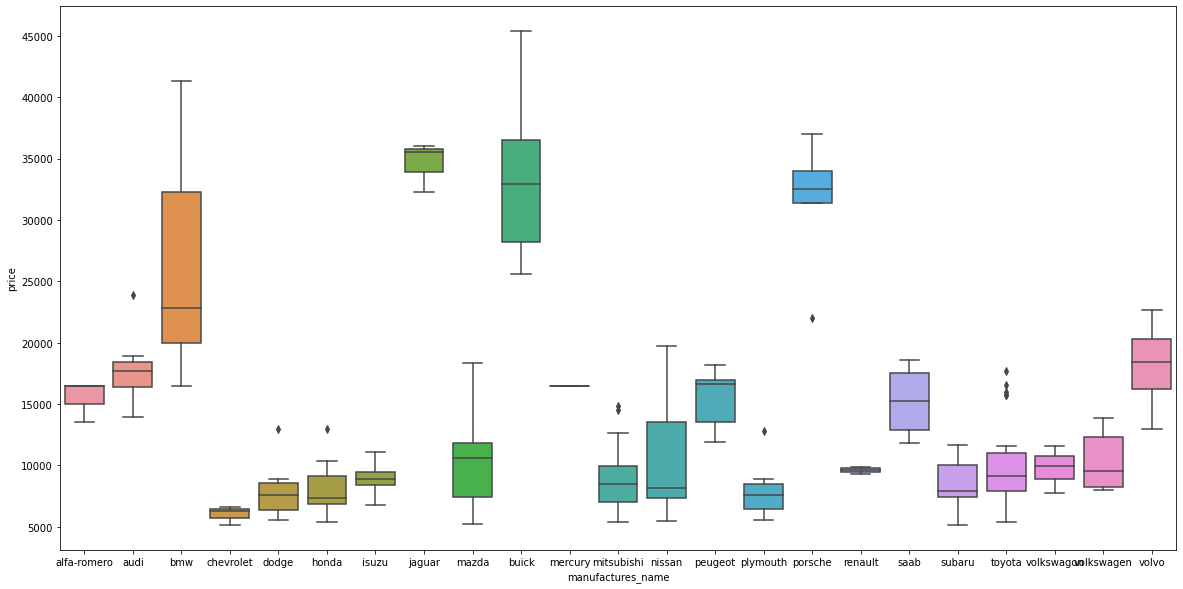

In [10]:
# Carname vs Price

plt.figure(figsize =(20,10))

sns.boxplot(x = 'manufactures_name', y = 'price', data = car_df)

In [11]:
#Dropping rows which has only one value for a given column(s) in the entire data set
car_df.drop(index = car_df[(car_df['enginetype'] == 'dohcv') | (car_df['cylindernumber'] == 'three') | (car_df['cylindernumber'] == 'twelve') | (car_df['fuelsystem'] == 'mfi') | (car_df['fuelsystem'] == 'spfi') | (car_df['CarName'] == 'mercury')].index,inplace = True)

## Dummy variable creation

In [12]:
#Creating dummiy variables for fueltype
fuel = pd.get_dummies(car_df['fueltype'])
fuel.drop(columns = ['gas'],inplace = True)
fuel.head()

,diesel
car_ID,
1,0
2,0
3,0
4,0
5,0


In [13]:
car_df = pd.concat([car_df, fuel], axis = 1)

In [14]:
car_df.drop(['fueltype'], axis = 1, inplace = True)

In [15]:
#Creating dummiy variables for aspiration
aspr = pd.get_dummies(car_df['aspiration'])
aspr.drop(columns = ['std'],inplace = True)
aspr.head()

,turbo
car_ID,
1,0
2,0
3,0
4,0
5,0


In [16]:
car_df = pd.concat([car_df, aspr], axis = 1)

In [17]:
# Dropping aspiration column after creating dummies
car_df.drop(['aspiration'], axis = 1, inplace = True)

In [18]:
#Creating dummiy variables for drivewheel
wheel = pd.get_dummies(car_df['drivewheel'])
wheel.drop(columns = ['fwd'],inplace = True)
wheel.head()

,4wd,rwd
car_ID,,
1,0,1
2,0,1
3,0,1
4,0,0
5,1,0


In [19]:
car_df = pd.concat([car_df, wheel], axis = 1)

In [20]:
car_df.drop(['drivewheel'], axis = 1, inplace = True)

In [21]:
#Creating dummiy variables for doornumber
doornum = pd.get_dummies(car_df['doornumber'])
doornum.drop(columns = ['two'],inplace = True)
doornum.head()

,four
car_ID,
1,0
2,0
3,0
4,1
5,1


In [22]:
car_df = pd.concat([car_df, doornum], axis = 1)
# Dropping doornumber column after creating dummies
car_df.drop(['doornumber'], axis = 1, inplace = True)

In [23]:
#Creating dummiy variables for enginelocation
eng_loc = pd.get_dummies(car_df['enginelocation'])
eng_loc.drop(columns = ['front'],inplace = True)
eng_loc.head()

,rear
car_ID,
1,0
2,0
3,0
4,0
5,0


In [24]:
car_df = pd.concat([car_df, eng_loc], axis = 1)
# Dropping enginelocation column after creating dummies
car_df.drop(['enginelocation'], axis = 1, inplace = True)

In [25]:
#Creating dummiy variables for enginetype
eng_type = pd.get_dummies(car_df['enginetype'])
eng_type.drop(columns = ['ohcf'],inplace = True)
eng_type.head()

,dohc,l,ohc,ohcv,rotor
car_ID,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
5,0,0,1,0,0


In [26]:
car_df = pd.concat([car_df, eng_type], axis = 1)
# Dropping enginetype column after creating dummies
car_df.drop(['enginetype'], axis = 1, inplace = True)

In [27]:
#Creating dummiy variables for cylindernumber
cyl_num = pd.get_dummies(car_df['cylindernumber'])
cyl_num.drop(columns = ['four'],inplace = True)
cyl_num.head()

,eight,five,six,two
car_ID,,,,
1,0,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0
5,0,1,0,0


In [28]:
car_df = pd.concat([car_df, cyl_num], axis = 1)
# Dropping cylindernumber column after creating dummies
car_df.drop(['cylindernumber'], axis = 1, inplace = True)

In [29]:
#Creating dummiy variables for fuelsystem
fuel_sys = pd.get_dummies(car_df['fuelsystem'])
fuel_sys.drop(columns = ['2bbl'],inplace = True)
fuel_sys.head()

,1bbl,4bbl,idi,mpfi,spdi
car_ID,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0


In [30]:
car_df = pd.concat([car_df, fuel_sys], axis = 1)
# Dropping fuelsystem column after creating dummies
car_df.drop(['fuelsystem'], axis = 1, inplace = True)

In [31]:
#Creating dummiy variables for CarName
carname = pd.get_dummies(car_df['manufactures_name'])
carname.drop(columns = ['chevrolet'],inplace = True)
carname.head()

,alfa-romero,audi,bmw,buick,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volkswagon,volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#Droping car_name and manufactures name
car_df = pd.concat([car_df, carname], axis = 1)
car_df.drop(['CarName'], axis = 1, inplace = True)
car_df.drop(['manufactures_name'], axis = 1, inplace = True)

In [33]:

print(car_df.shape)
car_df= car_df.loc[:,~car_df.columns.duplicated()]
print(car_df.shape)

car_df.head()

(200, 58)
(200, 58)


,symboling,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,turbo,4wd,rwd,four,rear,dohc,l,ohc,ohcv,rotor,eight,five,six,two,1bbl,4bbl,idi,mpfi,spdi,alfa-romero,audi,bmw,buick,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volkswagon,volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,convertible,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,convertible,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,hatchback,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,sedan,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,sedan,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Creating dummiy variables for carbody
carbody = pd.get_dummies(car_df['carbody'])
carbody.drop(columns = ['hatchback'],inplace = True)
carbody.head()

,convertible,hardtop,sedan,wagon
car_ID,,,,
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0
5,0,0,1,0


In [35]:
car_df = pd.concat([car_df, carbody], axis = 1)
car_df.drop(['carbody'], axis = 1, inplace = True)

In [36]:
import gc

In [37]:
car = car_df.copy()
del car_df
gc.collect()

80

In [38]:
car.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel',
       'turbo', '4wd', 'rwd', 'four', 'rear', 'dohc', 'l', 'ohc', 'ohcv',
       'rotor', 'eight', 'five', 'six', 'two', '1bbl', '4bbl', 'idi', 'mpfi',
       'spdi', 'alfa-romero', 'audi', 'bmw', 'buick', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volkswagon', 'volvo', 'convertible', 'hardtop', 'sedan',
       'wagon'],
      dtype='object')

In [39]:

# var = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
#        'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
#        'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
# from sklearn.preprocessing import LabelEncoder

# #le = LabelEncoder()

# #car[var] = car[var].apply(le.fit_transform)

In [40]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, test_size = 0.3, random_state = 1)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()


In [42]:
# Transforming the data for the columns other than dummy variables

df_train[var] = scaler.fit_transform(df_train[var])

In [43]:
# Dropping 'renault' column since it has no rows
df_train.drop(['renault'], axis =1, inplace = True)

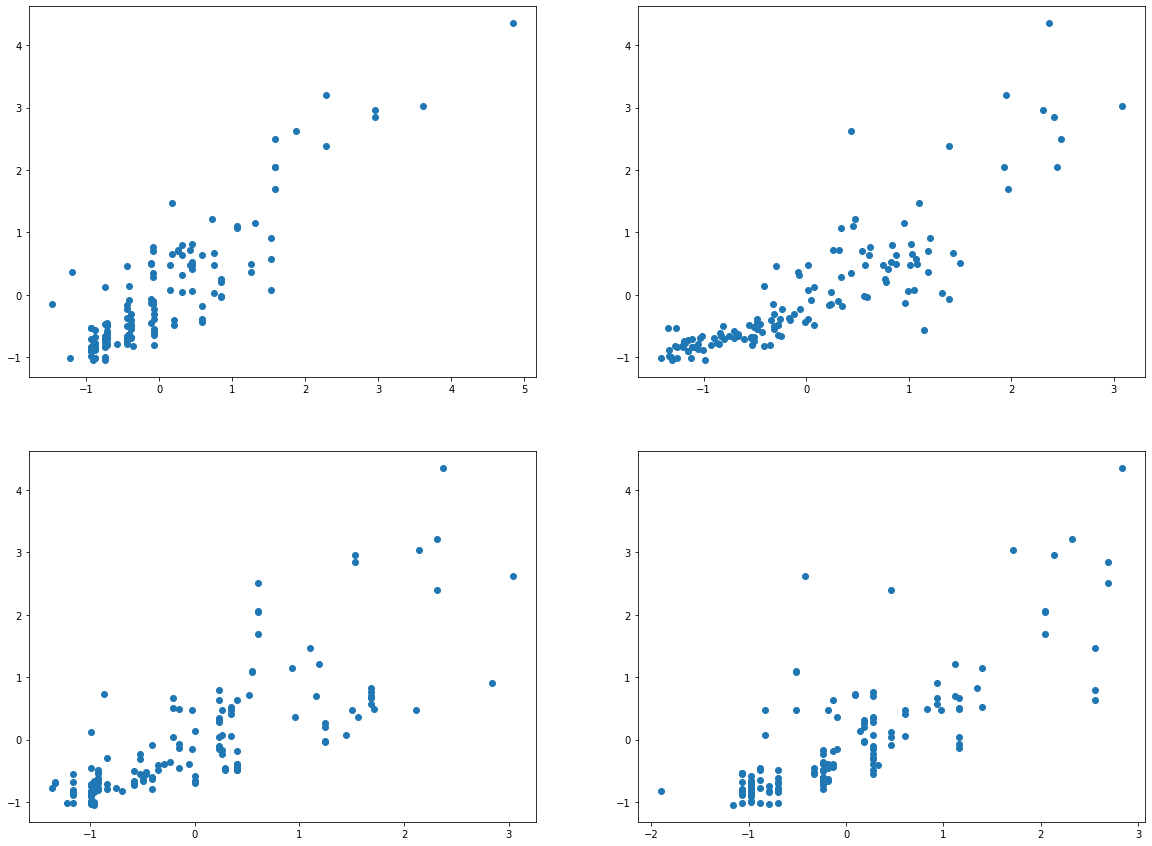

In [45]:
#plotting scatter plot to know the correlation

plt.figure(figsize =(20,15))
plt.subplot(221)
plt.scatter(x = df_train.enginesize, y = df_train.price)
plt.subplot(222)
plt.scatter(x = df_train.curbweight, y = df_train.price)
plt.subplot(223)
plt.scatter(x = df_train.horsepower, y = df_train.price)
plt.subplot(224)
plt.scatter(x = df_train.carwidth, y = df_train.price)



In [46]:
y_train = df_train.pop('price')
X_train = df_train

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
X_train.shape

(140, 59)

In [49]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('wheelbase', False, 5),
 ('carlength', False, 12),
 ('carwidth', False, 7),
 ('carheight', False, 33),
 ('curbweight', False, 11),
 ('enginesize', True, 1),
 ('boreratio', False, 21),
 ('stroke', False, 40),
 ('compressionratio', False, 4),
 ('horsepower', False, 43),
 ('peakrpm', False, 28),
 ('citympg', False, 38),
 ('highwaympg', False, 36),
 ('diesel', False, 3),
 ('turbo', False, 19),
 ('4wd', False, 37),
 ('rwd', False, 20),
 ('four', False, 18),
 ('rear', True, 1),
 ('dohc', False, 27),
 ('l', False, 6),
 ('ohc', True, 1),
 ('ohcv', False, 22),
 ('rotor', True, 1),
 ('eight', False, 35),
 ('five', False, 9),
 ('six', False, 14),
 ('two', True, 1),
 ('1bbl', False, 23),
 ('4bbl', True, 1),
 ('idi', False, 2),
 ('mpfi', False, 24),
 ('spdi', False, 25),
 ('alfa-romero', False, 26),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('dodge', False, 17),
 ('honda', False, 16),
 ('isuzu', False, 44),
 ('jaguar', True, 1),
 ('mazda', False, 29),

In [51]:
# Columns which rfe favours are assigned to new variable

col = X_train.columns[rfe.support_]
col

Index(['enginesize', 'rear', 'ohc', 'rotor', 'two', '4bbl', 'audi', 'bmw',
       'buick', 'jaguar', 'peugeot', 'porsche', 'saab', 'subaru',
       'convertible'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'diesel', 'turbo', '4wd', 'rwd',
       'four', 'dohc', 'l', 'ohcv', 'eight', 'five', 'six', '1bbl', 'idi',
       'mpfi', 'spdi', 'alfa-romero', 'dodge', 'honda', 'isuzu', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'plymouth', 'toyota', 'volkswagen',
       'volkswagon', 'volvo', 'hardtop', 'sedan', 'wagon'],
      dtype='object')

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [55]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     96.12
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           8.26e-60
Time:                        23:03:19   Log-Likelihood:                -26.086
No. Observations:                 140   AIC:                             82.17
Df Residuals:                     125   BIC:                             126.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1307      0.095     -1.380      

In [57]:
#Removing 4bbl since it has high p value
X_train_rfe = X_train_rfe.drop(['4bbl'],axis = 1)

# Removing the from X_train_lm
X_train_lm = X_train_lm.drop(['4bbl'],axis = 1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.07e-60
Time:                        23:03:20   Log-Likelihood:                -26.429
No. Observations:                 140   AIC:                             80.86
Df Residuals:                     126   BIC:                             122.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1315      0.095     -1.390      

In [58]:
#Removing ohc since it has high p value
#dropping ohc
X_train_rfe = X_train_rfe.drop(['ohc'],axis = 1)

# Removing the from X_train_lm
X_train_lm = X_train_lm.drop(['ohc'],axis = 1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     112.1
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.85e-61
Time:                        23:03:20   Log-Likelihood:                -27.129
No. Observations:                 140   AIC:                             80.26
Df Residuals:                     127   BIC:                             118.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2308      0.034     -6.800      

In [59]:
#Removing subaru since it has high p value
#dropping subaru
X_train_rfe = X_train_rfe.drop(['subaru'],axis = 1)

# Removing the from X_train_lm
X_train_lm = X_train_lm.drop(['subaru'],axis = 1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     123.0
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.84e-62
Time:                        23:03:20   Log-Likelihood:                -27.263
No. Observations:                 140   AIC:                             78.53
Df Residuals:                     128   BIC:                             113.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2354      0.033     -7.226      

In [60]:
#Removing rear since it has high p value
#dropping rear
X_train_rfe = X_train_rfe.drop(['rear'],axis = 1)

# Removing the from X_train_lm
X_train_lm = X_train_lm.drop(['rear'],axis = 1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.69e-63
Time:                        23:03:20   Log-Likelihood:                -28.486
No. Observations:                 140   AIC:                             78.97
Df Residuals:                     129   BIC:                             111.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2336      0.033     -7.141      

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,rotor,inf
2,two,inf
0,enginesize,2.01
5,buick,1.61
6,jaguar,1.19
4,bmw,1.11
8,porsche,1.05
10,convertible,1.04
3,audi,1.00
7,peugeot,1.00


In [62]:
#dropping two and rotor because in vif inf
X_train_rfe = X_train_rfe.drop(['rotor','two'],axis = 1)

# Removing the from X_train_lm
X_train_lm = X_train_lm.drop(['rotor','two'],axis = 1)

In [63]:
lm_1 = sm.OLS(y_train,X_train_lm).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     119.3
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           2.13e-58
Time:                        23:03:20   Log-Likelihood:                -42.846
No. Observations:                 140   AIC:                             105.7
Df Residuals:                     130   BIC:                             135.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2223      0.036     -6.171      

In [64]:
#Removing convertible since it has high p value
#dropping convertible
X_train_rfe = X_train_rfe.drop(['convertible'],axis = 1)

# Removing the from X_train_lm
X_train_lm = X_train_lm.drop(['convertible'],axis = 1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     131.0
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.13e-58
Time:                        23:03:20   Log-Likelihood:                -44.842
No. Observations:                 140   AIC:                             107.7
Df Residuals:                     131   BIC:                             134.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2091      0.036     -5.849      0.0

In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.90
3,buick,1.56
4,jaguar,1.18
2,bmw,1.11
6,porsche,1.05
1,audi,1.00
5,peugeot,1.00
7,saab,1.00


In [66]:
#Residual Analysis of the train data

y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

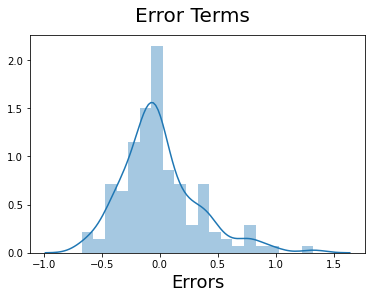

In [67]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

Text(0, 0.5, 'y_train_pred')

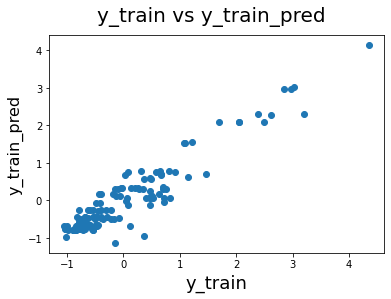

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_price)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16) 

In [68]:
df_test[var] = scaler.fit_transform(df_test[var])
y_test = df_test.pop('price')
X_test = df_test

In [69]:
X_train_lm = X_train_lm.drop(['const'],axis = 1)

In [70]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

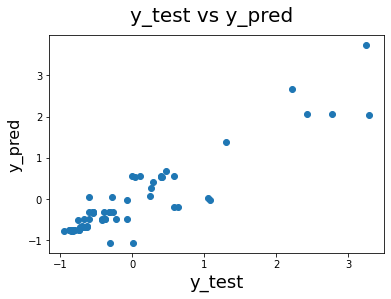

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [73]:
from sklearn.metrics import r2_score

In [76]:
#Evaluating the test_set based on r2_score
print ("Test set R2 score: ", r2_score(y_test,y_pred))

Test set R2 score:  0.8309614072603656


In [77]:
#Evaluating the train_set based on r2_score
print ("R2 score: ", r2_score(y_train,y_train_price))

R2 score:  0.8888950561399246
